## Generalization

### Training on Random Labels

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Transform for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Randomly shuffle labels for training
def shuffle_labels(dataset):
    labels = np.array(dataset.targets)
    np.random.shuffle(labels)
    dataset.targets = list(labels)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train and evaluate a model
def train_and_evaluate_model(model, trainset, testset, epochs=10, lr=0.001):
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
    testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Shuffle labels and train the model
shuffle_labels(trainset)
model = SimpleCNN()
accuracy_random_labels = train_and_evaluate_model(model, trainset, testset)
print(f"Accuracy with Random Labels: {accuracy_random_labels:.4f}")


100%|██████████| 170498071/170498071 [00:02<00:00, 63381035.20it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Accuracy with Random Labels: 0.0963


Number of parameters vs Generalization

Files already downloaded and verified
Files already downloaded and verified
Training Model 1...
Training Model 2...
Training Model 3...
Training Model 4...
Training Model 5...
Training Model 6...
Training Model 7...
Training Model 8...
Training Model 9...
Training Model 10...


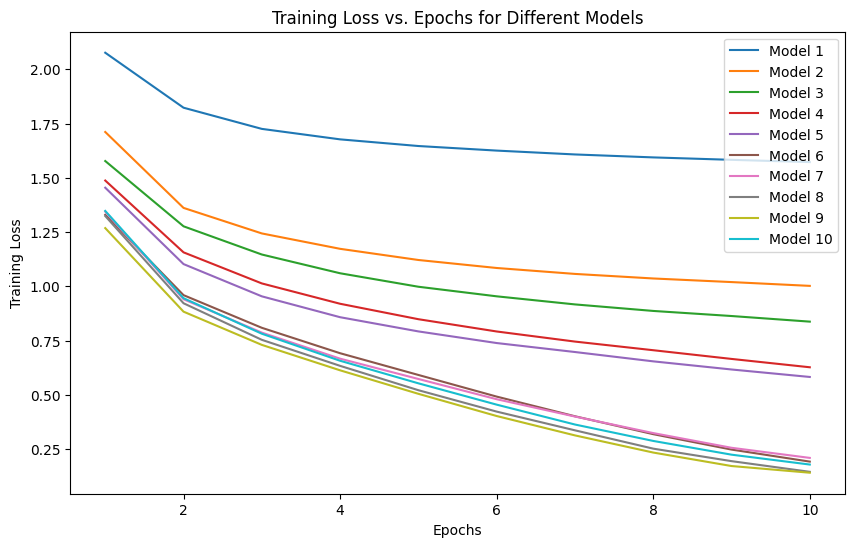

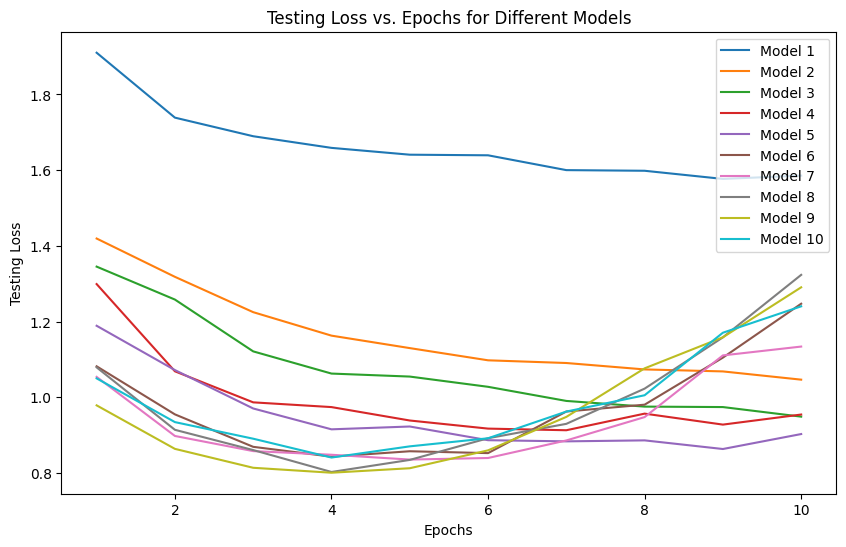

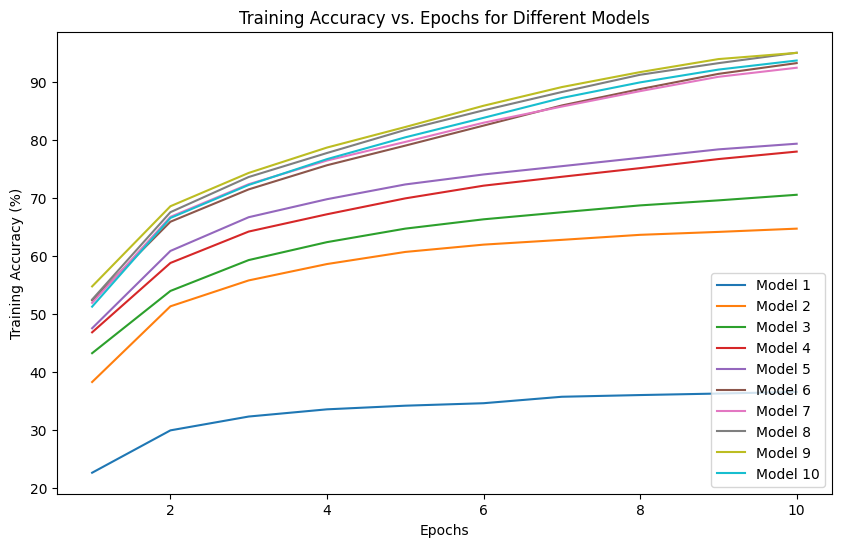

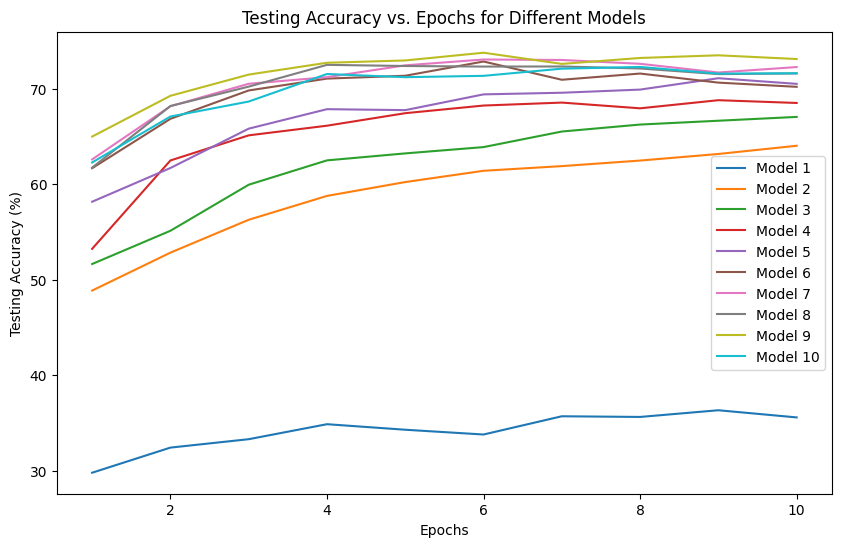

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Transform for CIFAR-10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define models with increasing number of parameters
class CNN_Model(nn.Module):
    def __init__(self, num_filters1, num_filters2, hidden_units):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(3, num_filters1, 3, padding=1)
        self.conv2 = nn.Conv2d(num_filters1, num_filters2, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(num_filters2 * 8 * 8, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, self.fc1.in_features)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Training and evaluation function
def train_and_evaluate_model(model, trainloader, testloader, epochs=10, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()

        train_loss.append(running_loss / len(trainloader))
        train_acc.append(100. * correct_train / total_train)

        # Evaluate on test set
        model.eval()
        running_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, predicted = outputs.max(1)
                total_test += labels.size(0)
                correct_test += predicted.eq(labels).sum().item()

        test_loss.append(running_loss / len(testloader))
        test_acc.append(100. * correct_test / total_test)

    return train_loss, train_acc, test_loss, test_acc

# Define 10 models with varying numbers of parameters
models = [
    CNN_Model(8, 8, 8),
    CNN_Model(8, 16, 16),
    CNN_Model(16, 16, 32),
    CNN_Model(16, 32, 64),
    CNN_Model(32, 32, 64),
    CNN_Model(32, 64, 128),
    CNN_Model(64, 64, 128),
    CNN_Model(64, 96, 128),
    CNN_Model(96, 128, 128),
    CNN_Model(128, 128, 256)
]

model_names = [f"Model {i+1}" for i in range(len(models))]

train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []

# Train each model and record the results
for model, name in zip(models, model_names):
    print(f"Training {name}...")
    train_loss, train_acc, test_loss, test_acc = train_and_evaluate_model(model, trainloader, testloader)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

# Plot the results
epochs = range(1, 11)

# Training loss plot
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot(epochs, train_losses[i], label=model_names[i])
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epochs for Different Models')
plt.legend()
plt.show()

# Testing loss plot
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot(epochs, test_losses[i], label=model_names[i])
plt.xlabel('Epochs')
plt.ylabel('Testing Loss')
plt.title('Testing Loss vs. Epochs for Different Models')
plt.legend()
plt.show()

# Training accuracy plot
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot(epochs, train_accuracies[i], label=model_names[i])
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy vs. Epochs for Different Models')
plt.legend()
plt.show()

# Testing accuracy plot
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot(epochs, test_accuracies[i], label=model_names[i])
plt.xlabel('Epochs')
plt.ylabel('Testing Accuracy (%)')
plt.title('Testing Accuracy vs. Epochs for Different Models')
plt.legend()
plt.show()


### Flatness vs Generalization

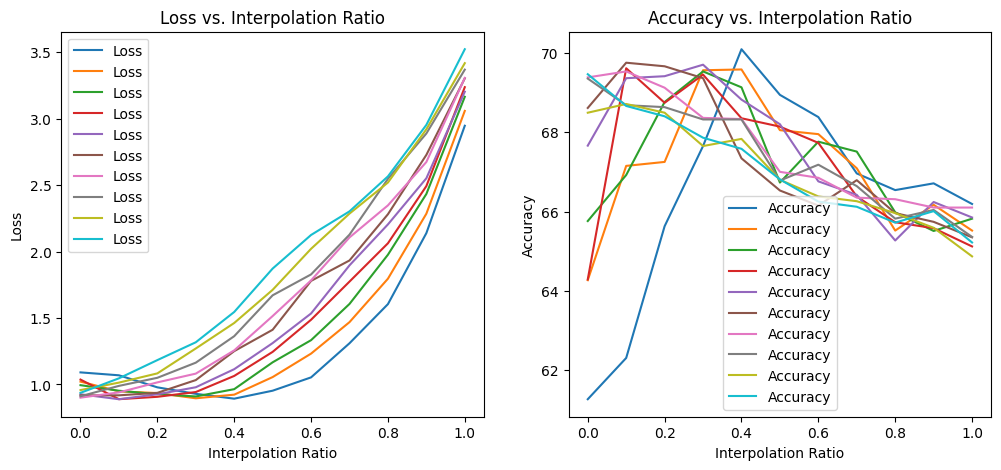

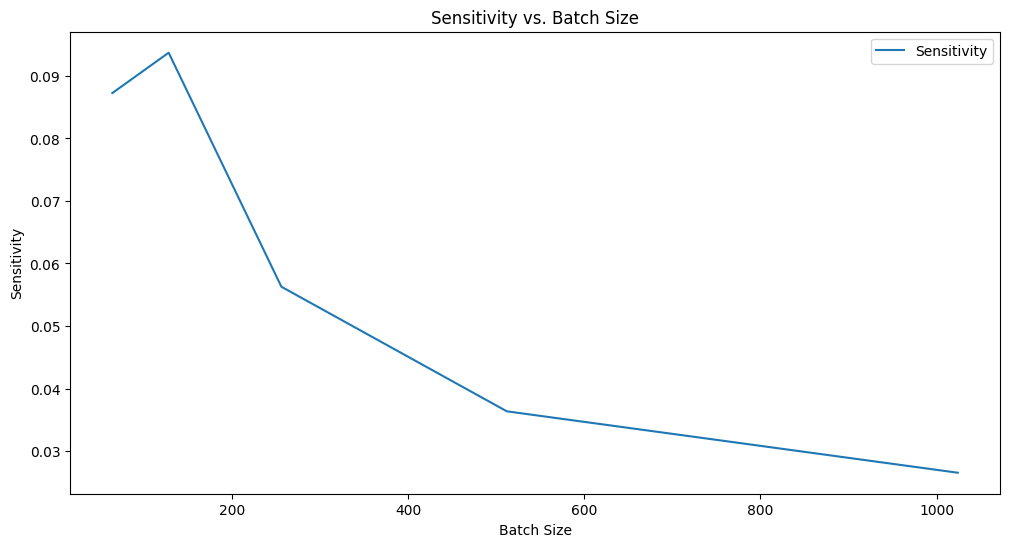

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Define a simple CNN model
class CNN_Model(nn.Module):
    def __init__(self, num_filters1, num_filters2, hidden_units):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(3, num_filters1, 3, padding=1)
        self.conv2 = nn.Conv2d(num_filters1, num_filters2, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(num_filters2 * 8 * 8, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, self.fc1.in_features)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Define function to train a model
def train_model(model, trainloader, testloader, epochs=10, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()

        train_loss.append(running_loss / len(trainloader))
        train_acc.append(100. * correct_train / total_train)

        # Evaluate on test set
        model.eval()
        running_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, predicted = outputs.max(1)
                total_test += labels.size(0)
                correct_test += predicted.eq(labels).sum().item()

        test_loss.append(running_loss / len(testloader))
        test_acc.append(100. * correct_test / total_test)

    return train_loss, train_acc, test_loss, test_acc

# Define function to compute sensitivity
def compute_sensitivity(model, dataloader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    sensitivity = []

    for inputs, _ in dataloader:
        inputs = inputs.to(device)
        inputs.requires_grad_()
        outputs = model(inputs)
        loss = outputs.mean()  # Dummy loss for sensitivity calculation

        gradients = torch.autograd.grad(loss, inputs, retain_graph=True)[0]
        frobenius_norm = torch.norm(gradients, p='fro').item()
        sensitivity.append(frobenius_norm)

    return np.mean(sensitivity)

# Define batch sizes for different training approaches
batch_sizes = [64, 128, 256, 512, 1024]
models = []
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
sensitivities = []

for batch_size in batch_sizes:
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

    model = CNN_Model(16, 32, 64)
    train_loss, train_acc, test_loss, test_acc = train_model(model, trainloader, testloader)

    sensitivity = compute_sensitivity(model, testloader)

    models.append(model)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    sensitivities.append(sensitivity)

# Plot results for Part 1: Linear Interpolation
batch_size_m1 = 64
batch_size_m2 = 1024
trainloader_m1 = torch.utils.data.DataLoader(trainset, batch_size=batch_size_m1, shuffle=True)
testloader_m1 = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
trainloader_m2 = torch.utils.data.DataLoader(trainset, batch_size=batch_size_m2, shuffle=True)
testloader_m2 = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

model_m1 = CNN_Model(16, 32, 64)
model_m2 = CNN_Model(16, 32, 64)

train_model(model_m1, trainloader_m1, testloader_m1)
train_model(model_m2, trainloader_m2, testloader_m2)

interpolation_ratios = np.linspace(0, 1, num=11)
losses = []
accuracies = []

for ratio in interpolation_ratios:
    with torch.no_grad():
        for param_m1, param_m2, param_inter in zip(model_m1.parameters(), model_m2.parameters(), model_m1.parameters()):
            param_inter.data = ratio * param_m1.data + (1 - ratio) * param_m2.data

    test_loss, test_acc = train_model(model_m1, trainloader_m1, testloader_m1)[2:4]

    losses.append(test_loss)
    accuracies.append(test_acc)

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(interpolation_ratios, losses, label='Loss')
plt.xlabel('Interpolation Ratio')
plt.ylabel('Loss')
plt.title('Loss vs. Interpolation Ratio')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(interpolation_ratios, accuracies, label='Accuracy')
plt.xlabel('Interpolation Ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Interpolation Ratio')
plt.legend()

plt.show()

# Plot results for Part 2: Sensitivity vs. Generalization
plt.figure(figsize=(12, 6))
plt.plot(batch_sizes, sensitivities, label='Sensitivity')
plt.xlabel('Batch Size')
plt.ylabel('Sensitivity')
plt.title('Sensitivity vs. Batch Size')
plt.legend()
plt.show()
